**Task 3 : Number Recognition using Neural Network**

Importing the Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading MNIST Dataset

In [3]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
len(x_train)

60000

In [7]:
len(x_test)

10000

Training set : 60000

Testing set  : 10000

In [8]:
x_train[0].shape

(28, 28)

In [9]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [10]:
print('Y_Train : ',np.unique(y_train))
print('Y_Test : ',np.unique(y_test))

Y_Train :  [0 1 2 3 4 5 6 7 8 9]
Y_Test :  [0 1 2 3 4 5 6 7 8 9]


1st Image :

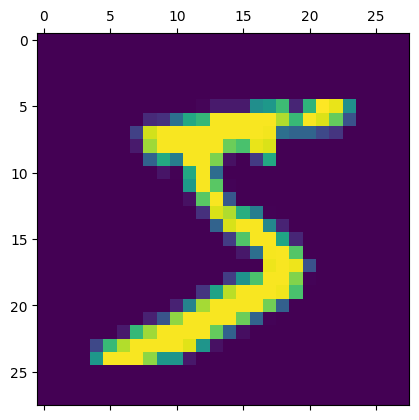

In [11]:
plt.matshow(x_train[0])

Corresponding Digit :

In [12]:
y_train[0]

5

In [13]:
x_train.shape

(60000, 28, 28)

Scaling the Data :

In [14]:
x_train=x_train/255
x_test=x_test/255

In [15]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Building the Neural Network :

Without Hidden Layer :

In [16]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

In [17]:
model.compile(
    optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [18]:
model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4683 - accuracy: 0.8775
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3035 - accuracy: 0.9153
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2830 - accuracy: 0.9214
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2730 - accuracy: 0.9239
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2665 - accuracy: 0.9256
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2618 - accuracy: 0.9271
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2584 - accuracy: 0.9288
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2548 - accuracy: 0.9295
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2528 - accuracy: 0.9303
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.250

In [21]:
accuracy=model.evaluate(x_test,y_test)
print(accuracy)

313/313 [==============================] - 0s 1ms/step - loss: 0.2623 - accuracy: 0.9282
[0.2622685432434082, 0.9282000064849854]


Using Hidden Layer :

In [23]:
model2=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,input_shape=(784,),activation='relu'), #hidden layer
    keras.layers.Dense(10,activation='sigmoid')])


In [24]:
model2.compile(
    optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [38]:
model2.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2725 - accuracy: 0.9229
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1200 - accuracy: 0.9647
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0844 - accuracy: 0.9750
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0643 - accuracy: 0.9806
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0510 - accuracy: 0.9844
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0416 - accuracy: 0.9872
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0346 - accuracy: 0.9895
Epoch 8/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0277 - accuracy: 0.9919
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0232 - accuracy: 0.9926
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.01

In [39]:
model2.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0893 - accuracy: 0.9756


[0.08925037831068039, 0.975600004196167]

So, The model has highest accuracy with using hidden layer.

Accuracy : 97%

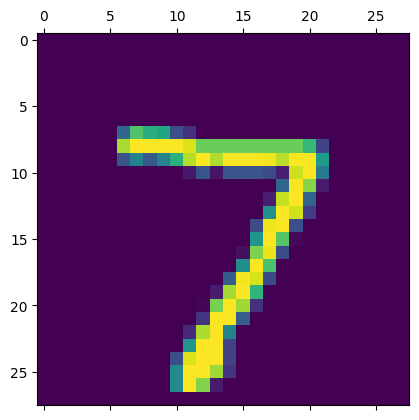

In [40]:
plt.matshow(x_test[0])

In [41]:
y_pred=model2.predict(x_test)
y_pred[0]

313/313 [==============================] - 1s 2ms/step


array([1.07261156e-04, 3.93475988e-04, 1.71214238e-01, 5.68502247e-01,
       1.55038231e-06, 1.06353982e-05, 4.49068523e-07, 9.99995053e-01,
       4.40916568e-02, 3.02133858e-02], dtype=float32)

In [42]:
np.argmax(y_pred[0])

7

In [43]:
y_pred_labels=[np.argmax(i)for i in y_pred]
y_pred_labels[:3]

[7, 2, 1]

In [44]:
y_test[:3]

array([7, 2, 1], dtype=uint8)

In [45]:
cm=confusion_matrix(labels=y_test,predictions=y_pred_labels)

Text(95.72222222222221, 0.5, 'Truth')

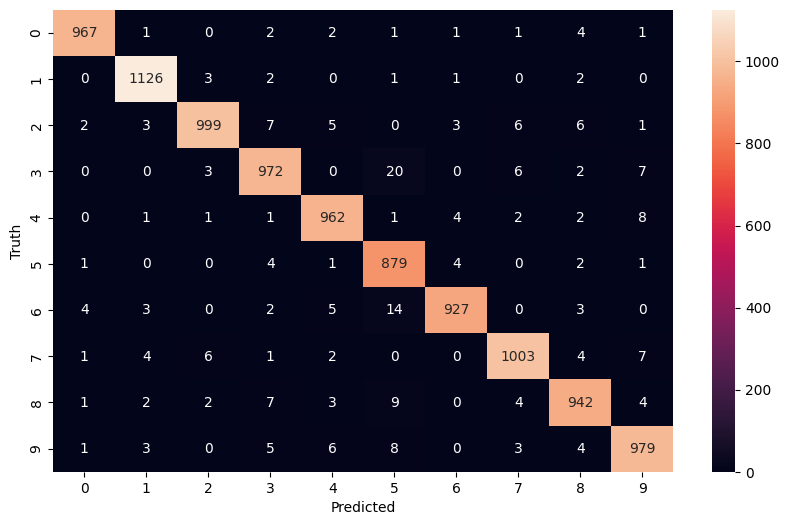

In [46]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

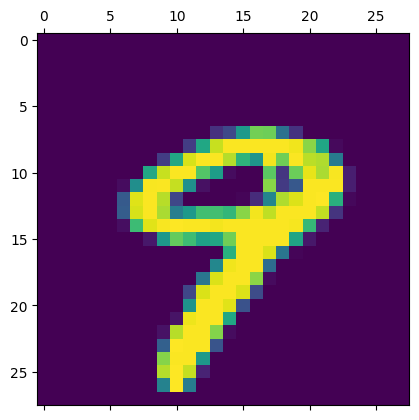

In [47]:
plt.matshow(x_test[9])

In [48]:
np.argmax(y_pred[9])

9

In [ ]:
plt.matshow(x_test[9])

Prediction :

Path of the image to be predicted: /content/MNIST_digit.png


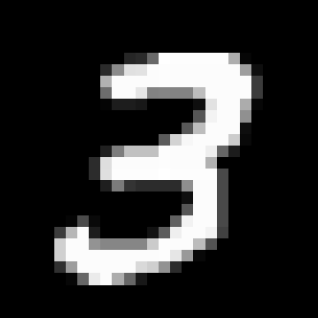

1/1 [==============================] - 0s 25ms/step
The Handwritten Digit is recognised as  3


In [69]:
path = input('Path of the image to be predicted: ')
input_image = cv2.imread(path)
cv2_imshow(input_image)
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
input_image_resize = cv2.resize(grayscale, (28, 28))
input_image_resize = input_image_resize/255
image_reshaped = np.reshape(input_image_resize, [1,28,28])
input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)

Path of the image to be predicted: /content/mnist 7.png


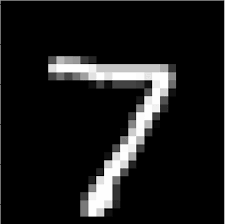

1/1 [==============================] - 0s 28ms/step
The Handwritten Digit is recognised as  7


In [74]:
path = input('Path of the image to be predicted: ')
input_image = cv2.imread(path)
cv2_imshow(input_image)
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
input_image_resize = cv2.resize(grayscale, (28, 28))
input_image_resize = input_image_resize/255
image_reshaped = np.reshape(input_image_resize, [1,28,28])
input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)